Python Task 1.
Read in five arbitrary 256x256 pixel colour images, display and display the values of the R, G and B channels separately on a histogram. (4p)

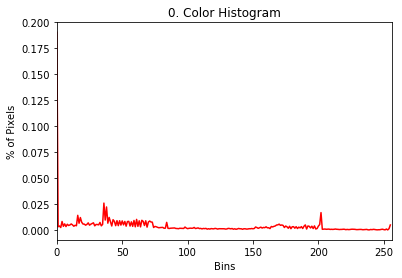

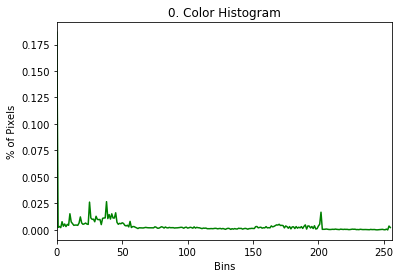

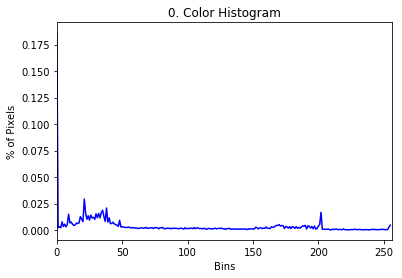

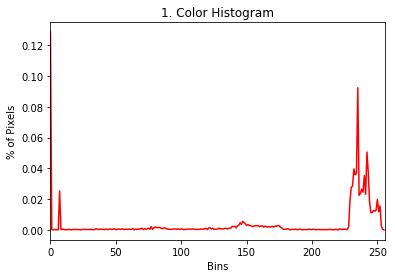

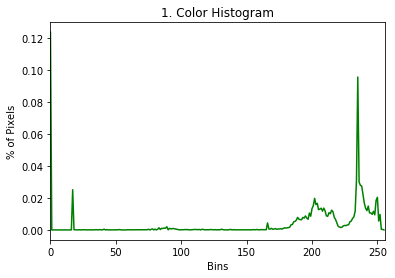

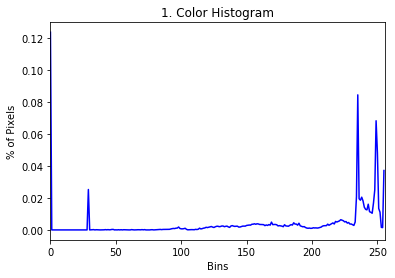

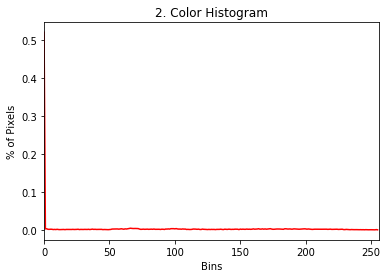

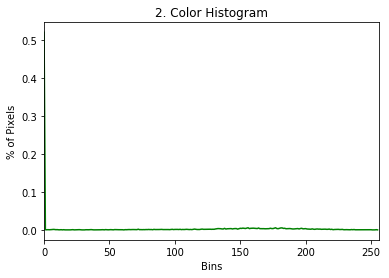

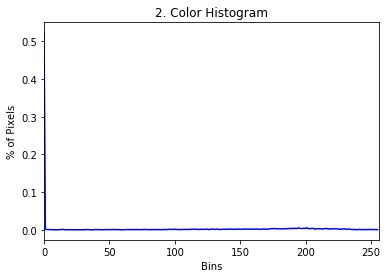

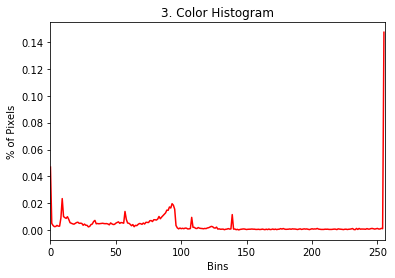

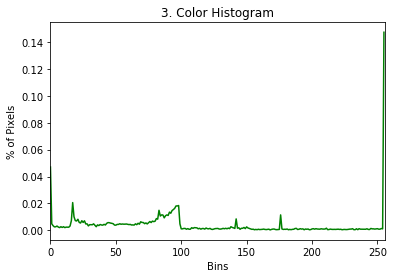

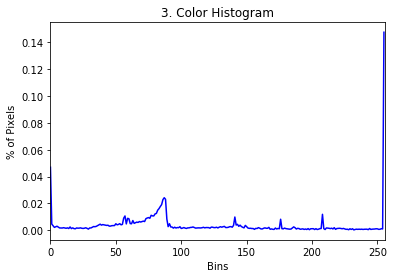

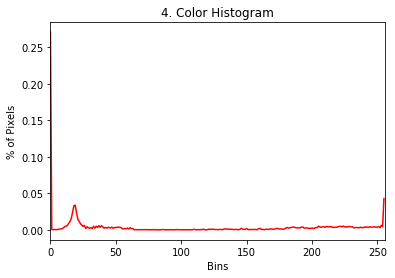

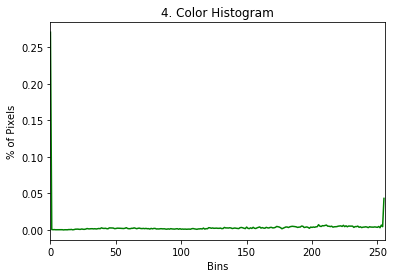

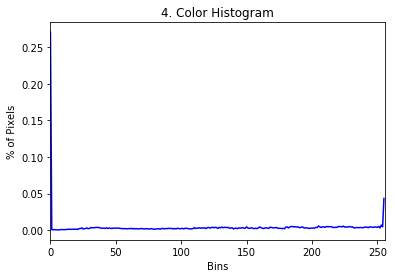

In [12]:
# Author: Gábor Lévai 
# Neptun: AKTA7P
# Last modified: 2021-09-30

import urllib.request
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

# Downloading the pictures
urllib.request.urlretrieve(
  'https://icons.iconarchive.com/icons/treetog/junior/128/folder-blue-pictures-icon.png',
   "pic0.png")

urllib.request.urlretrieve(
  'https://icons.iconarchive.com/icons/dapino/summer-holiday/128/photo-icon.png',
   "pic1.png")

urllib.request.urlretrieve(
  'https://icons.iconarchive.com/icons/itzikgur/my-seven/128/Graphics-Painting-icon.png',
   "pic2.png")

urllib.request.urlretrieve(
  'https://icons.iconarchive.com/icons/babasse/old-school/128/My-Picture-old-school-icon.png',
   "pic3.png")

urllib.request.urlretrieve(
  'https://icons.iconarchive.com/icons/gakuseisean/aire/128/Pictures-icon.png',
   "pic4.png")


for k in range(5):
    filename = "pic" + str(k) + ".png"
    img = Image.open(filename)
    img.show()
    
    image = cv2.imread(filename)
    
    for i, col in enumerate(['r', 'g', 'b']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])

        # Normalize the Histogram
        hist /= hist.sum()
        plt.figure()
        plt.title(str(k)+ ". " + "Color Histogram")
        plt.xlabel("Bins")
        plt.ylabel("% of Pixels")
        plt.plot(hist, color = col)
        plt.xlim([0, 256])
        plt.show()

Python Task 2.
Calculate the mean and standard deviation of pixels per channel for each image, then convert them to a data set with 0 expected values and 1 standard deviation. Then check the expected value and variance of the resulting data set. (4p)

In [17]:
import urllib.request
import numpy as np
import cv2

from PIL import Image
from matplotlib import pyplot as plt
from numpy import asarray
from numpy import mean
from numpy import var

for k in range(5):
    filename = "pic" + str(k) + ".png"
    img = Image.open(filename)
    pixels = asarray(img)

    # confirm pixel range is 0-255
    print('Data Type: %s' % pixels.dtype)
    print('Pixel Range before Normalization \t Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

    # convert from integers to floats
    pixels = pixels.astype('float32')
    
    # normalize to the range 0-1
    pixels /= 255.0
    
    # confirm the normalization
    print('Pixel Range after Normalization \t Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
    
    # calculate the mean of pixels
    meanResult = mean(pixels)
    print('Pixel Mean: %.3f' % (meanResult))
    
    # calculate the variance of pixels
    varResult = var(pixels)
    print('Pixel Variance: %.3f\n' % (varResult))

        
    

Data Type: uint8
Pixel Range before Normalization 	 Min: 0.000, Max: 255.000
Pixel Range after Normalization 	 Min: 0.000, Max: 1.000
Pixel Mean: 0.391
Pixel Variance: 0.147

Data Type: uint8
Pixel Range before Normalization 	 Min: 0.000, Max: 255.000
Pixel Range after Normalization 	 Min: 0.000, Max: 1.000
Pixel Mean: 0.757
Pixel Variance: 0.116

Data Type: uint8
Pixel Range before Normalization 	 Min: 0.000, Max: 255.000
Pixel Range after Normalization 	 Min: 0.000, Max: 1.000
Pixel Mean: 0.310
Pixel Variance: 0.144

Data Type: uint8
Pixel Range before Normalization 	 Min: 0.000, Max: 255.000
Pixel Range after Normalization 	 Min: 0.000, Max: 1.000
Pixel Mean: 0.522
Pixel Variance: 0.142

Data Type: uint8
Pixel Range before Normalization 	 Min: 0.000, Max: 255.000
Pixel Range after Normalization 	 Min: 0.000, Max: 1.000
Pixel Mean: 0.495
Pixel Variance: 0.172



Python Task 3.
Read in any two sound files and display their spectrograms (4p)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


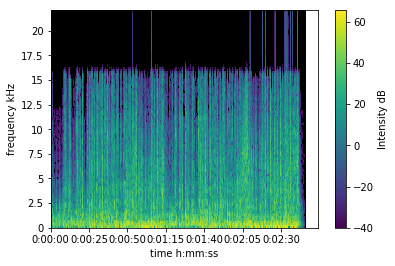

In [21]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

cmap = plt.get_cmap('viridis') # this may fail on older versions of matplotlib
vmin = -40  # hide anything below -40 dB
cmap.set_under(color='k', alpha=None)

rate, frames = wavfile.read("music.wav")
fig, ax = plt.subplots()
pxx, freq, t, cax = ax.specgram(frames[:, 0], # first channel
                                Fs=rate,      # to get frequency axis in Hz
                                cmap=cmap, vmin=vmin)
cbar = fig.colorbar(cax)
cbar.set_label('Intensity dB')
ax.axis("tight")

# Prettify
import matplotlib
import datetime

ax.set_xlabel('time h:mm:ss')
ax.set_ylabel('frequency kHz')

scale = 1e3                     # KHz
ticks = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale))
ax.yaxis.set_major_formatter(ticks)

def timeTicks(x, pos):
    d = datetime.timedelta(seconds=x)
    return str(d)
formatter = matplotlib.ticker.FuncFormatter(timeTicks)
ax.xaxis.set_major_formatter(formatter)
plt.show()

Python Task 4.
Transform the spectrograms into a data set with expected value 0 and multiplicity 1. Then check the expected value and variance of the resulting data set. (4p)

In [14]:
from pydub import AudioSegment

def match_target_amplitude(sound, target_dBFS):
    change_in_dBFS = target_dBFS - sound.dBFS
    return sound.apply_gain(change_in_dBFS)

sound = AudioSegment.from_file("music.wav", "wav")
normalized_sound = match_target_amplitude(sound, -20.0)
normalized_sound.export("normalizedMusic.wav", format="wav")

ModuleNotFoundError: No module named 'pydub'

Python Task 5.
From a Python script, download the text content of the page http://smartlab.tmit.bme.hu/oktatas-deep-learning, display the text content and display the frequency of the letters in the content on a histogram (4p)

In [93]:
import matplotlib.pyplot as plt
import urllib.request
import urllib.parse
import re

from string import ascii_lowercase
from collections import Counter

url = 'http://smartlab.tmit.bme.hu/oktatas-deep-learning'
values = {'s':'basics',
          'submit':'search'}
data = urllib.parse.urlencode(values)
data = data.encode('utf-8')
req = urllib.request.Request(url, data)
resp = urllib.request.urlopen(req)
respData = resp.read().decode('UTF-8')

#print(respData)

paragraphs = re.findall(r'<em>(.*?)</em>', respData, 0)
paragraphs += re.findall(r'<p>(.*?)</p>', respData, 0)
paragraphs += re.findall(r'<br>(.*?)</br>', respData, 0)
paragraphs += re.findall(r'<b>(.*?)</b>', respData, 0)
paragraphs += re.findall(r'(?:<([A-Z][A-Z0-9]*)\b[^>]*>(.*?)</\1>)', respData, 0)
paragraphs += re.findall(r'<li>(.*?)</li>', respData, 0)
  
paragraphs += re.findall(r'<h1>(.*?)</h1>', respData, 0)
paragraphs += re.findall(r'<h2>(.*?)</h2>', respData, 0)
paragraphs += re.findall(r'<h3>(.*?)</h3>', respData, 0)
paragraphs += re.findall(r'<h4>(.*?)</h4>', respData, 0)

for eachP in paragraphs:
    print(eachP)
    
file = open('hf.txt', 'w')
file.write(str)
file.close()

with open('hf.txt') as f:
     c = Counter(letter for line in f 
                  for letter in line.lower() 
                  if letter in ascii_lowercase)

print("\n \n \t \t Results:\n")
print(c)



Nagy Balázs - BME GPK, Mechatronikai mérnök, doktorandusz
Hallgatói vélemény
Hallgatói vélemény
"...iszonyatosan élveztem az órát, a legjobb volt az egyetemi tanulmányaim alatt. Tetszett a modern, agilis hozzáállás és az, hogy végre egy cutting edge technológiát tanulhattam gyakorlati alapokon."
Hallgatói vélemény
<em>"...iszonyatosan élveztem az órát, a legjobb volt az egyetemi tanulmányaim alatt. Tetszett a modern, agilis hozzáállás és az, hogy végre egy cutting edge technológiát tanulhattam gyakorlati alapokon."</em>
Az aláírás feltétele a házi feladat elkészítése és a gyakorlatok 70%-án való részvétel. Lehetőségek az osztályzatra:
A házi feladat benyújtásának határideje a szorgalmi időszak utolsó hetének pénteki napja, <B>hosszabbítási lehetőség nincs</B>. A benyújtott feladatok GitHub forrása a szorgalmi időszak utolsó hetének vasárnapjáig módosítható.
Laboratóriumunk magyar és idegennyelvű gépi szövegfelolvasó fejlesztésével, az ember-gép kapcsolat vizsgálatával és modern gépi ta